<a href="https://colab.research.google.com/github/sharan6422/Predictive-Analysis-of-Electric-Vehicles-for-Sustainable-Mobility/blob/main/dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Library import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
!pip install imbalanced-learn

loading dataset

In [ ]:
df = pd.read_csv('1.csv', error_bad_lines=False)

<ipython-input-2-538bd64455e2>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('1.csv', error_bad_lines=False)


In [ ]:
print('instances : ', df.shape[0])
print('features : ', df.shape[1])

instances :  100975
features :  17


In [ ]:
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,14.0,141151601.0,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47.0,0.0,23.0,171566447.0,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,36.0,9426525.0,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0.0,36.0,211807760.0,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210.0,0.0,22.0,185810306.0,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [ ]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
unique_items = df['City'].unique()
print(unique_items)

['Yakima' 'Poulsbo' 'Seattle' 'Lacey' 'Olympia' 'Tumwater' 'Rochester'
 'Bremerton' 'Bainbridge Island' 'Everett' 'Leavenworth' 'Mill Creek'
 'Snohomish' 'Mount Vernon' 'Arlington' 'Lake Stevens' 'Burlington'
 'Anacortes' 'Edmonds' 'Bothell' 'Sultan' 'Spokane' 'Pullman' 'Yelm'
 'Port Orchard' 'Palouse' 'Monroe' 'Marysville' 'Mukilteo' 'Brier'
 'Lynnwood' 'Kettle Falls' 'Orondo' 'Selah' 'Oak Harbor' 'Clinton'
 'Cheney' 'Granite Falls' 'Renton' nan 'Walla Walla' 'Freeland' 'Kent'
 'Redmond' 'Vancouver' 'Tukwila' 'Federal Way' 'Kirkland' 'Bellevue'
 'Battle Ground' 'Duvall' 'Brush Prairie' 'Sammamish' 'Burien' 'Auburn'
 'Bingen' 'Camas' 'Issaquah' 'Shoreline' 'Covington' 'Woodinville'
 'Longview' 'Olalla' 'Normandy Park' 'Port Townsend' 'North Bend'
 'Seabeck' 'Medina' 'Maple Valley' 'Newcastle' 'Des Moines' 'Ridgefield'
 'Washougal' 'Kelso' 'Kenmore' 'Nine Mile Falls' 'Moxee' 'Seatac'
 'La Center' 'Lake Forest Park' 'Sunnyside' 'Kalama' 'Grandview' 'Sequim'
 'Beaux Arts' 'Silverdale' 'Qu

Missing values

In [ ]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 2
City                                                   2
State                                                  0
Postal Code                                            2
Model Year                                             0
Make                                                   0
Model                                                183
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                  64
DOL Vehicle ID                                         1
Vehicle Location                                      12
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

In [ ]:
df.columns[df.isnull().any()]

Index(['County', 'City', 'Postal Code', 'Model', 'Electric Range', 'Base MSRP',
       'Legislative District', 'DOL Vehicle ID', 'Vehicle Location',
       'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
df.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                       float64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

EV population in counties

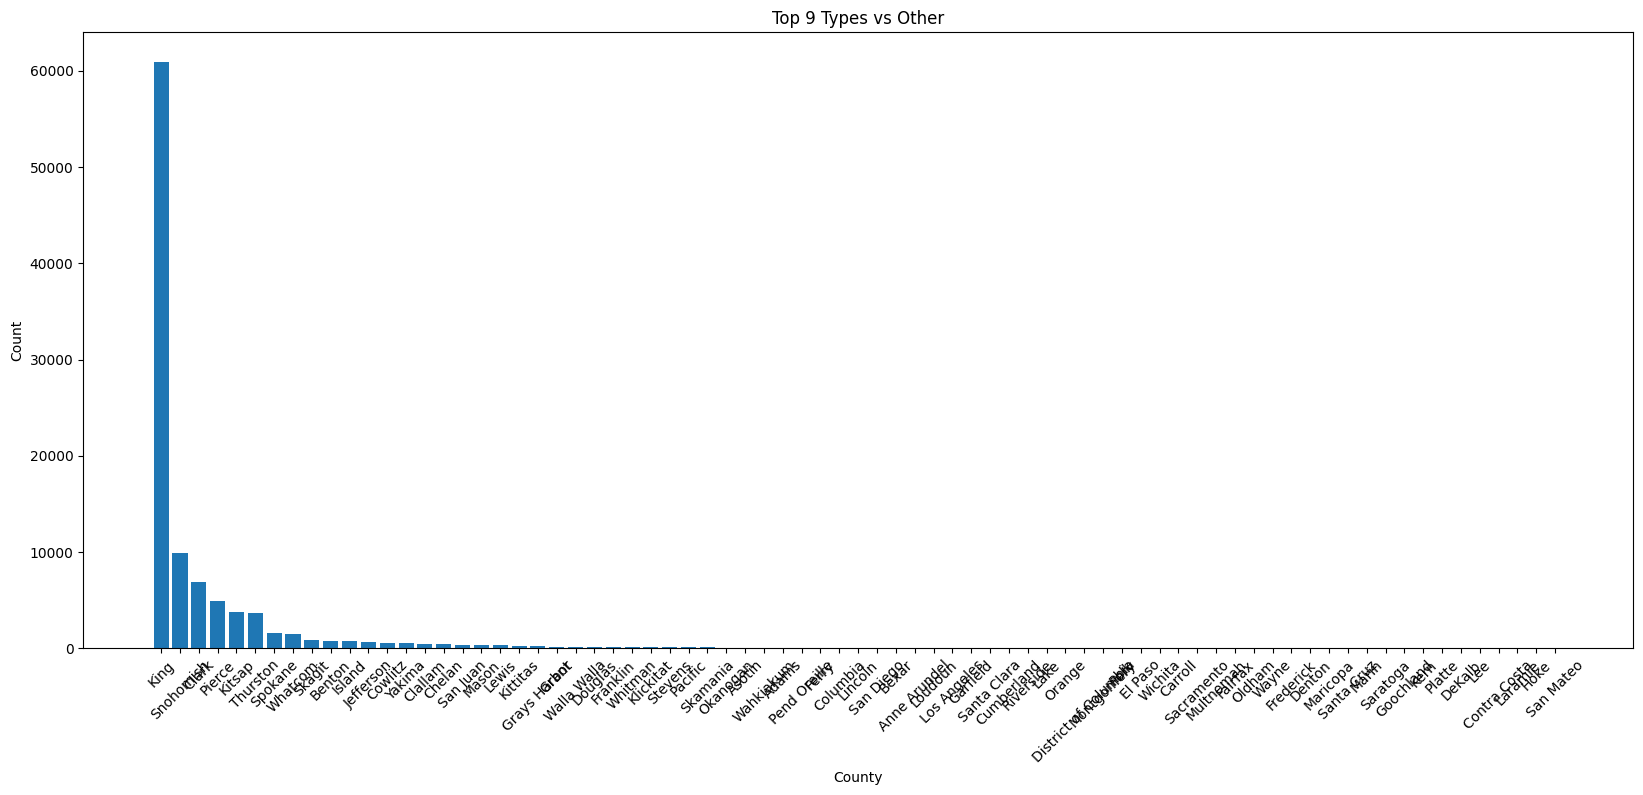

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
counts = df['County'].value_counts()
plt.figure(figsize=(20, 8))
plt.bar(counts.index, counts.values)
plt.xlabel('County')
plt.ylabel('Count')
plt.title('Top 9 Types vs Other')
plt.xticks(rotation=45)
plt.show()

CAFV graph

<Axes: ylabel='Clean Alternative Fuel Vehicle (CAFV) Eligibility'>

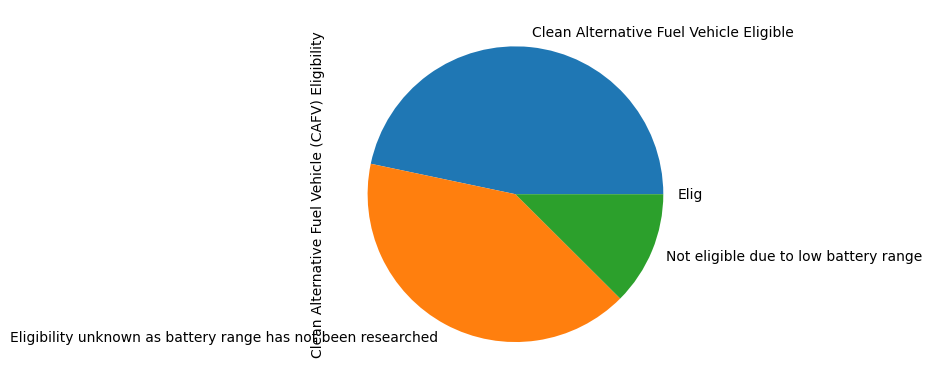

In [ ]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts().plot.pie()

In [ ]:
#missing_data_mask = df[missing_data].isnull()

#plt.figure(figsize=(10, 6))
#sns.heatmap(missing_data_mask, cbar=False, cmap='viridis')
#plt.xticks([])
#plt.xlabel("Features", fontsize=14)
#plt.ylabel("Rows", fontsize=14)
#plt.title("Missing Values Heatmap", fontsize=16)

#plt.show()


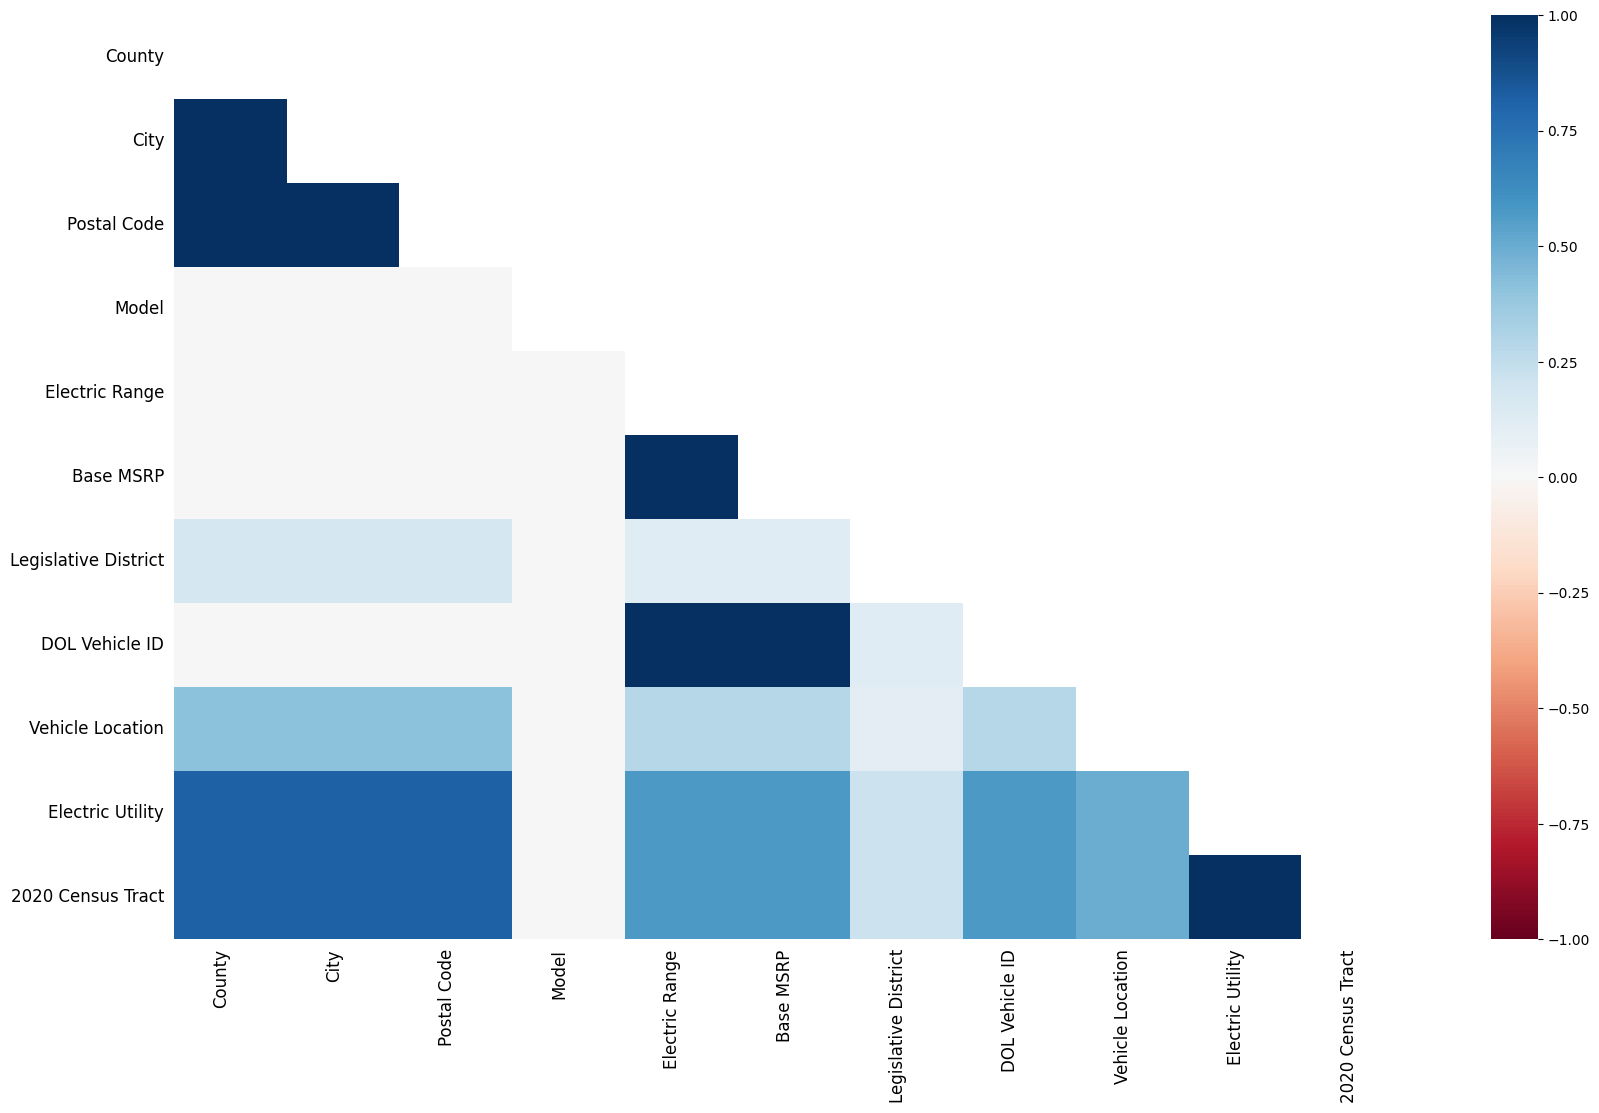

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

missing_data = df.columns[df.isnull().any()]

g = msno.heatmap(df[missing_data], fontsize=12, labels=False)

g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.show()


Finding missing values

In [ ]:

columns_to_check = ['County', 'City']
missing_values_mask = df[columns_to_check].isnull().any(axis=1)
df = df[~missing_values_mask]
missing_values_count = df.isnull().sum()
print(missing_values_count)


VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                183
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                  62
DOL Vehicle ID                                         1
Vehicle Location                                      10
Electric Utility                                       1
2020 Census Tract                                      1
dtype: int64


Imputing for missing values

In [ ]:

def impute_numeric_data(data, columns, mode):
    for col in columns:
        if mode == 'median':
            value = data[col].median()
        elif mode == 'mean':
            value = data[col].mean()
        data[col].fillna(value, inplace=True)

def impute_categoric_data(data, columns):
    for col in columns:
        mode_value = data[col].mode().iloc[0]
        data[col].fillna(mode_value, inplace=True)


impute_numeric_data(df, ['Legislative District'], 'median')
impute_categoric_data(df, ['Model', 'Vehicle Location'])


df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       1
Base MSRP                                            1
Legislative District                                 0
DOL Vehicle ID                                       1
Vehicle Location                                     0
Electric Utility                                     1
2020 Census Tract                                    1
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer


def impute_numeric_data(data, columns, strategy):
    imputer = SimpleImputer(strategy=strategy)
    data[columns] = imputer.fit_transform(data[columns])

def impute_categoric_data(data, columns):
    for col in columns:
        mode_value = data[col].mode().iloc[0]
        data[col].fillna(mode_value, inplace=True)

numeric_columns = ['Legislative District']
categoric_columns = ['Model', 'Vehicle Location']

impute_numeric_data(df, numeric_columns, strategy='median')
impute_categoric_data(df, categoric_columns)

missing_values_count = df.isnull().sum()
print(missing_values_count)


VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       1
Base MSRP                                            1
Legislative District                                 0
DOL Vehicle ID                                       1
Vehicle Location                                     0
Electric Utility                                     1
2020 Census Tract                                    1
dtype: int64


Feature Engineering

In [ ]:
df['Electric Vehicle Type'] = df['Electric Vehicle Type'].apply(lambda x: \
                                                                x.replace('Plug-in Hybrid Electric Vehicle (PHEV)', 'PHEV')
                                                                .replace('Battery Electric Vehicle (BEV)', 'BEV'))

df.rename(columns={'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'Clean Alternative Fuel Vehicle Eligibility'}, inplace=True)

def extract_coordinates(point_string):
    coordinates = point_string.replace('POINT', '').replace('(', '').replace(')', '')
    longitude, latitude = coordinates.split()
    return float(longitude), float(latitude)

df[['Longitude', 'Latitude']] = df['Vehicle Location'].apply(extract_coordinates).apply(pd.Series)
df = df.drop('Vehicle Location', axis=1)

def state_mapping(state_code):
    state_mapping = {
        'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
        'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
        'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
        'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
        'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
        'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
        'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
        'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
        'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
        'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
        'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
        'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
        'WI': 'Wisconsin', 'WY': 'Wyoming'
    }

    return state_mapping.get(state_code, 'Unknown')

df['State'] = df['State'].apply(state_mapping)

def extract_substring(data, column_name):
    data[column_name] = data[column_name].str.split('-|\\|').str[0].str.strip()

extract_substring(df, 'Electric Utility')

In [ ]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude
0,5YJXCAE26J,Yakima,Yakima,Washington,98908.0,2018,TESLA,MODEL X,BEV,Clean Alternative Fuel Vehicle Eligible,238.0,0.0,14.0,141151601.0,PACIFICORP,5.307700e+10,-120.56916,46.58514
1,JHMZC5F37M,Kitsap,Poulsbo,Washington,98370.0,2021,HONDA,CLARITY,PHEV,Clean Alternative Fuel Vehicle Eligible,47.0,0.0,23.0,171566447.0,PUGET SOUND ENERGY INC,5.303509e+10,-122.64681,47.73689
2,5YJ3E1EB0K,King,Seattle,Washington,98199.0,2019,TESLA,MODEL 3,BEV,Clean Alternative Fuel Vehicle Eligible,220.0,0.0,36.0,9426525.0,CITY OF SEATTLE,5.303301e+10,-122.40092,47.65908
3,1N4AZ0CP5D,King,Seattle,Washington,98119.0,2013,NISSAN,LEAF,BEV,Clean Alternative Fuel Vehicle Eligible,75.0,0.0,36.0,211807760.0,CITY OF SEATTLE,5.303301e+10,-122.36840,47.64586
4,5YJSA1E21H,Thurston,Lacey,Washington,98516.0,2017,TESLA,MODEL S,BEV,Clean Alternative Fuel Vehicle Eligible,210.0,0.0,22.0,185810306.0,PUGET SOUND ENERGY INC,5.306701e+10,-122.75379,47.06316


encoding


In [ ]:
category = df.select_dtypes(include='object')

for col in category.columns:
    print(df[col].value_counts())
    print()


5YJYGDEE0M    366
5YJYGDEE8M    353
5YJYGDEE9M    352
5YJYGDEE2M    350
7SAYGDEE8N    345
             ... 
YV4H60CMXN      1
50EA1GDAXN      1
WP0BA2Y11N      1
YV4BC0PM3H      1
KNDCC3LD2L      1
Name: VIN (1-10), Length: 8320, dtype: int64

King            60960
Snohomish        9909
Clark            6837
Pierce           4931
Kitsap           3728
                ...  
Lee                 1
Contra Costa        1
Laramie             1
Hoke                1
San Mateo           1
Name: County, Length: 75, dtype: int64

Seattle      20528
Bellevue      6284
Vancouver     4178
Redmond       3900
Kirkland      3741
             ...  
Pittsburg        1
Addy             1
Kapowsin         1
Bucoda           1
Menifee          1
Name: City, Length: 452, dtype: int64

Washington        100912
California            22
Texas                  7
Maryland               6
Virginia               4
North Carolina         4
Nebraska               2
Georgia                2
Illinois               2
U

In [ ]:
categorical_columns = category.columns

In [ ]:
category = df.select_dtypes(include='object')

for col in category.columns:
    print(df[col].value_counts())
    print()
categorical_columns = category.columns

print("Categorical Columns:", categorical_columns)


5YJYGDEE0M    366
5YJYGDEE8M    353
5YJYGDEE9M    352
5YJYGDEE2M    350
7SAYGDEE8N    345
             ... 
YV4H60CMXN      1
50EA1GDAXN      1
WP0BA2Y11N      1
YV4BC0PM3H      1
KNDCC3LD2L      1
Name: VIN (1-10), Length: 8320, dtype: int64

King            60960
Snohomish        9909
Clark            6837
Pierce           4931
Kitsap           3728
                ...  
Lee                 1
Contra Costa        1
Laramie             1
Hoke                1
San Mateo           1
Name: County, Length: 75, dtype: int64

Seattle      20528
Bellevue      6284
Vancouver     4178
Redmond       3900
Kirkland      3741
             ...  
Pittsburg        1
Addy             1
Kapowsin         1
Bucoda           1
Menifee          1
Name: City, Length: 452, dtype: int64

Washington        100912
California            22
Texas                  7
Maryland               6
Virginia               4
North Carolina         4
Nebraska               2
Georgia                2
Illinois               2
U

In [ ]:
!pip install category-encoders


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce


def encode_data(data, columns, method):


    if method == 'ohe':
        encoded_columns = pd.get_dummies(data[columns], prefix=columns)
        data = pd.concat([data, encoded_columns], axis=1)
        data.drop(columns, axis=1, inplace=True)


    elif method == 'ordinal':
        ordinal_enc = OrdinalEncoder()
        encoded_columns = ordinal_enc.fit_transform(data[columns])
        data[columns] = encoded_columns
        data[columns] = encoded_columns.astype(int)


    elif method == 'frequency':
        encoder = ce.CountEncoder(cols=columns)
        data = encoder.fit_transform(data)

    return data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [ ]:
ordinal_columns = ['State', 'Make', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle Eligibility']
frequency_columns = ['VIN (1-10)', 'County', 'City', 'Model', 'Electric Utility']

train = df.copy()

train = encode_data(train, ordinal_columns, method='ordinal')
train = encode_data(train, frequency_columns, method='frequency')

train

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude
0,21,584,383,17,98908.0,2018,29,3794,0,0,238.0,0.0,14.0,141151601.0,690,5.307700e+10,-120.56916,46.58514
1,1,3728,479,17,98370.0,2021,11,577,1,0,47.0,0.0,23.0,171566447.0,60681,5.303509e+10,-122.64681,47.73689
2,176,60960,20528,17,98199.0,2019,29,19985,0,0,220.0,0.0,36.0,9426525.0,21935,5.303301e+10,-122.40092,47.65908
3,133,60960,20528,17,98119.0,2013,23,10276,0,0,75.0,0.0,36.0,211807760.0,21935,5.303301e+10,-122.36840,47.64586
4,52,3661,469,17,98516.0,2017,29,5753,0,0,210.0,0.0,22.0,185810306.0,60681,5.306701e+10,-122.75379,47.06316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100970,241,1597,842,17,99208.0,2022,29,19985,0,2,0.0,0.0,6.0,202158757.0,15840,5.306301e+10,-117.45005,47.73330
100971,323,60960,6284,17,98004.0,2021,29,17218,0,2,0.0,0.0,41.0,171558131.0,60681,5.303302e+10,-122.18720,47.61001
100972,18,60960,363,17,98045.0,2022,24,516,0,2,0.0,0.0,5.0,205628944.0,60681,5.303303e+10,-121.78310,47.49348
100973,10,840,57,17,98284.0,2021,32,1823,0,2,0.0,0.0,39.0,198895224.0,60681,5.305795e+10,-122.23857,48.50858


In [ ]:
df.shape

(100973, 18)

In [ ]:
train.shape

(100973, 18)

Explorotary Data Analysis

In [ ]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude
0,5YJXCAE26J,Yakima,Yakima,Washington,98908.0,2018,TESLA,MODEL X,BEV,Clean Alternative Fuel Vehicle Eligible,238.0,0.0,14.0,141151601.0,PACIFICORP,5.307700e+10,-120.56916,46.58514
1,JHMZC5F37M,Kitsap,Poulsbo,Washington,98370.0,2021,HONDA,CLARITY,PHEV,Clean Alternative Fuel Vehicle Eligible,47.0,0.0,23.0,171566447.0,PUGET SOUND ENERGY INC,5.303509e+10,-122.64681,47.73689
2,5YJ3E1EB0K,King,Seattle,Washington,98199.0,2019,TESLA,MODEL 3,BEV,Clean Alternative Fuel Vehicle Eligible,220.0,0.0,36.0,9426525.0,CITY OF SEATTLE,5.303301e+10,-122.40092,47.65908
3,1N4AZ0CP5D,King,Seattle,Washington,98119.0,2013,NISSAN,LEAF,BEV,Clean Alternative Fuel Vehicle Eligible,75.0,0.0,36.0,211807760.0,CITY OF SEATTLE,5.303301e+10,-122.36840,47.64586
4,5YJSA1E21H,Thurston,Lacey,Washington,98516.0,2017,TESLA,MODEL S,BEV,Clean Alternative Fuel Vehicle Eligible,210.0,0.0,22.0,185810306.0,PUGET SOUND ENERGY INC,5.306701e+10,-122.75379,47.06316


Univariate Analysis

In [ ]:
def countplot_univariate(data, column, hue, label, max_sample, num_x_ticks, x_ticks, width, height, y_title, orient, title):

    plt.figure(figsize=(width, height))
    plt.suptitle(f'{title}', y=y_title)

    order = data[column].value_counts().nlargest(max_sample).index if max_sample > 0 else data[column].value_counts().index
    if orient == 'vertical':
        g = sns.countplot(x=column, hue=hue, order=order, data=data, palette='muted')
        g.set(xlabel=label, ylabel='Number')
    elif orient == 'horizontal':
        g = sns.countplot(y=column, hue=hue, order=order, data=data, palette='muted')
        g.set(xlabel='Number', ylabel=label)

    plt.legend(title='Target', labels=['BEV', 'PHEV'], fontsize=11)

    if num_x_ticks > 0:
        x_ticks_list = list(range(num_x_ticks))
        plt.xticks(x_ticks_list, x_ticks, fontsize=11)

    total = len(data[column])

    for p in g.patches:
        if orient == 'vertical':
            height = p.get_height()
            percentage = (height / total) * 100
            g.annotate(f'{percentage:.1f}%', (p.get_x() + (p.get_width() + 0.05) / 2, height + 1000), \
                            ha='center', va='bottom', fontsize=12)
        elif orient == 'horizontal':
            width = p.get_width()
            percentage = (width / total) * 100
            g.annotate(f'{percentage:.1f}%', (width + 250, p.get_y() + p.get_height() / 2), \
                       ha='left', va='center', fontsize=11)

    plt.show()

In [ ]:
def change_to_others(data, column_name, percent):

    data = data.copy()

    value_counts = data[column_name].value_counts(normalize=True)
    low_frequency_values = value_counts[value_counts < percent].index
    data[column_name] = np.where(data[column_name].isin(low_frequency_values), "Others", data[column_name])

    return data

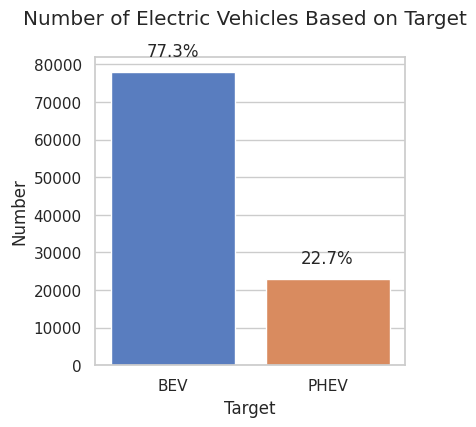

In [ ]:
sns.set_theme(style="whitegrid")

chart = 'Number of Electric Vehicles Based on Target'

plt.figure(figsize=(4, 4))
plt.suptitle(f'{chart}', y=1)

g = sns.countplot(x='Electric Vehicle Type', data=df, palette='muted')
g.set(ylabel='Number', xlabel='Target')

plt.xticks([0, 1], ['BEV', 'PHEV'], fontsize=11)

total = len(df['Electric Vehicle Type'])
for p in g.patches:
            height = p.get_height()
            percentage = (height / total) * 100
            g.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height + 3000), \
                            ha='center', va='bottom', fontsize=12)

plt.show()

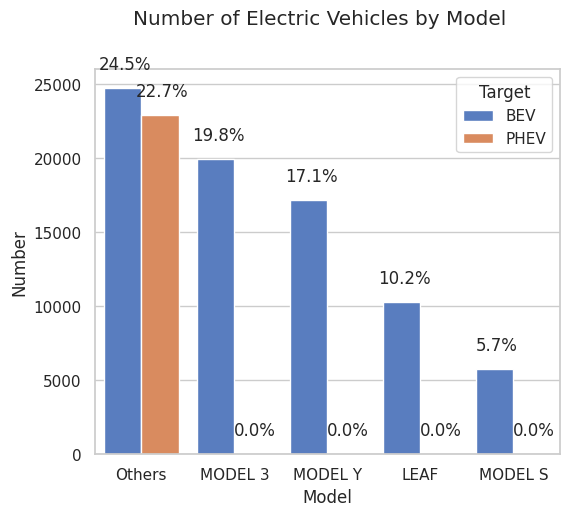

In [ ]:
df2 = change_to_others(df, 'Model', 0.05)

chart = 'Number of Electric Vehicles by Model'

countplot_univariate(df2, 'Model', 'Electric Vehicle Type', 'Model', 0, 0, None, 6, 5, 1, \
                     'vertical', chart)

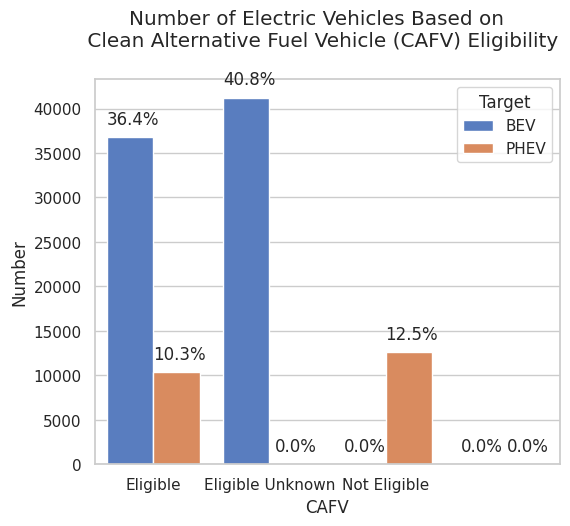

In [ ]:
chart = 'Number of Electric Vehicles Based on \n Clean Alternative Fuel Vehicle (CAFV) Eligibility'

countplot_univariate(df, 'Clean Alternative Fuel Vehicle Eligibility', 'Electric Vehicle Type', 'CAFV', \
                     0, 3, ['Eligible', 'Eligible Unknown', 'Not Eligible'], 6, 5, 1.02, 'vertical', chart)

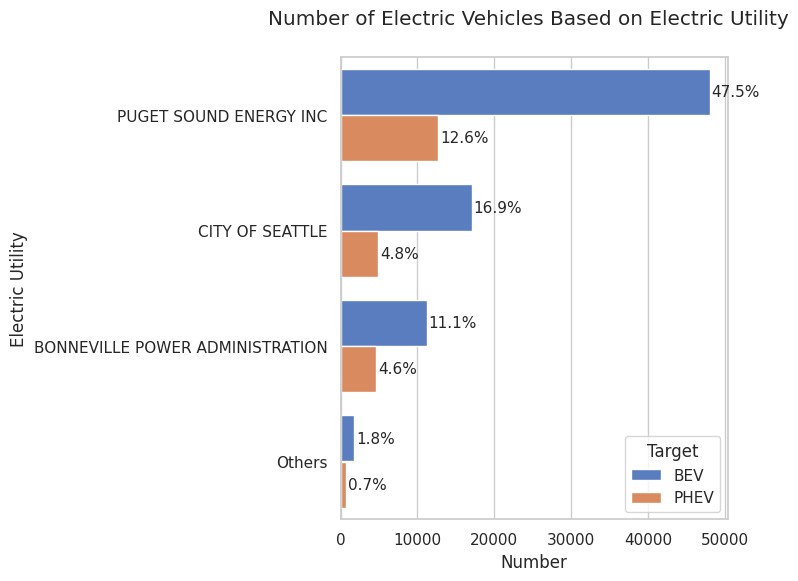

In [ ]:
df2 = change_to_others(df, 'Electric Utility', 0.007)

chart = 'Number of Electric Vehicles Based on Electric Utility'

countplot_univariate(df2, 'Electric Utility', 'Electric Vehicle Type', 'Electric Utility', 0, 0, None, 5, 6, 0.96, \
                     'horizontal', chart)

Bivariate Analysis

In [ ]:

def boxplot_bivariate(data, x, y, hue, label, label2, width, height, y_title, orient, title):

    plt.figure(figsize=(width, height))
    plt.suptitle(f'{title}', y=y_title)

    df_biv = data.copy()
    df_biv[x] = df_biv[x].apply(lambda x: 'Eligible' if x == 'Clean Alternative Fuel Vehicle Eligible' \
                                else ('Unknown' if x == 'Eligibility unknown as battery range has not been researched' \
                                else 'Not Eligible'))

    if orient == 'vertical':
        g = sns.boxplot(x=x, y=y, hue=hue, showmeans=True, palette='muted', data=df_biv)
        g.set(xlabel=label2, ylabel=label)
    elif orient == 'horizontal':
        g = sns.boxplot(x=y, y=x, hue=hue, showmeans=True, palette='muted', data=df_biv)
        g.set(xlabel=label2, ylabel=label)

    plt.show()

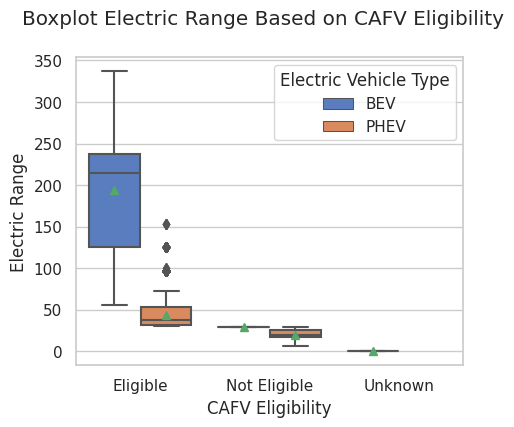

In [ ]:

chart = 'Boxplot Electric Range Based on CAFV Eligibility'

boxplot_bivariate(df, 'Clean Alternative Fuel Vehicle Eligibility', 'Electric Range', \
                  'Electric Vehicle Type', 'Electric Range', 'CAFV Eligibility', 5, 4, 1, 'vertical', chart)

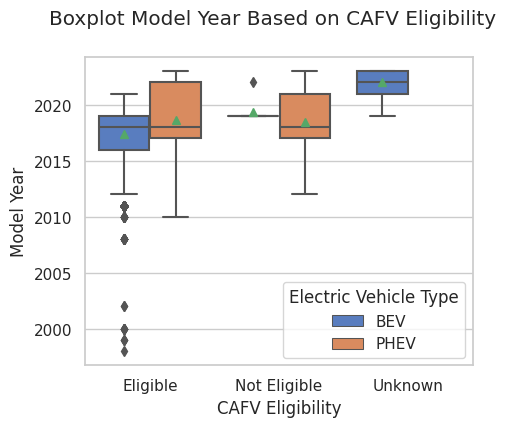

In [ ]:

chart = 'Boxplot Model Year Based on CAFV Eligibility'

boxplot_bivariate(df, 'Clean Alternative Fuel Vehicle Eligibility', 'Model Year', \
                  'Electric Vehicle Type', 'Model Year', 'CAFV Eligibility', 5, 4, 1, 'vertical', chart)

Feature Correlation

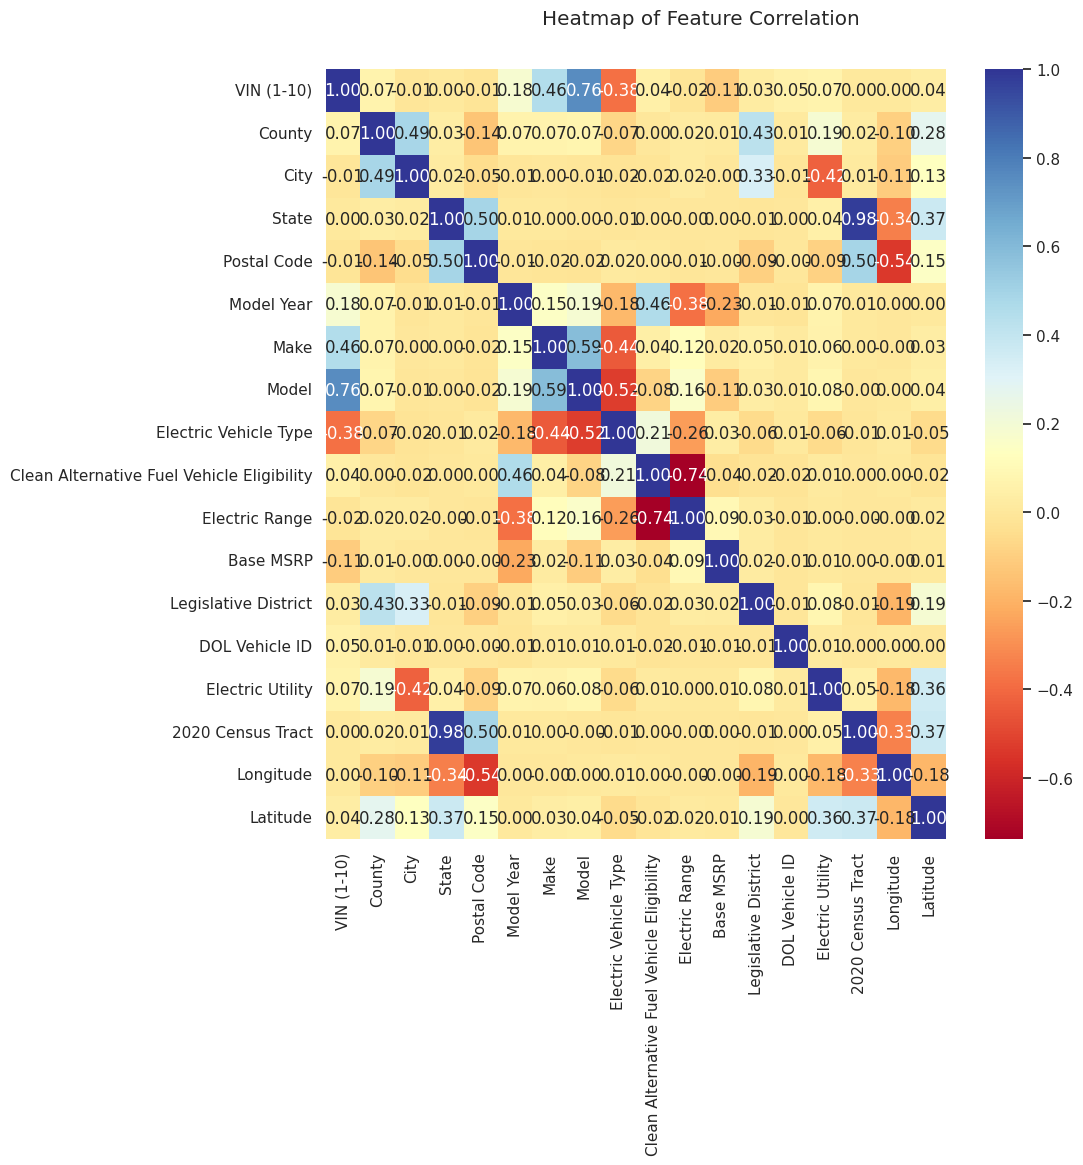

In [ ]:
sns.set_theme(style="whitegrid")

chart = 'Heatmap of Feature Correlation'

plt.figure(figsize=(10, 10))
plt.suptitle(f'{chart}', y=0.94)

sns.heatmap(train.corr(), annot=True, cmap='RdYlBu', fmt='.2f')
plt.show()

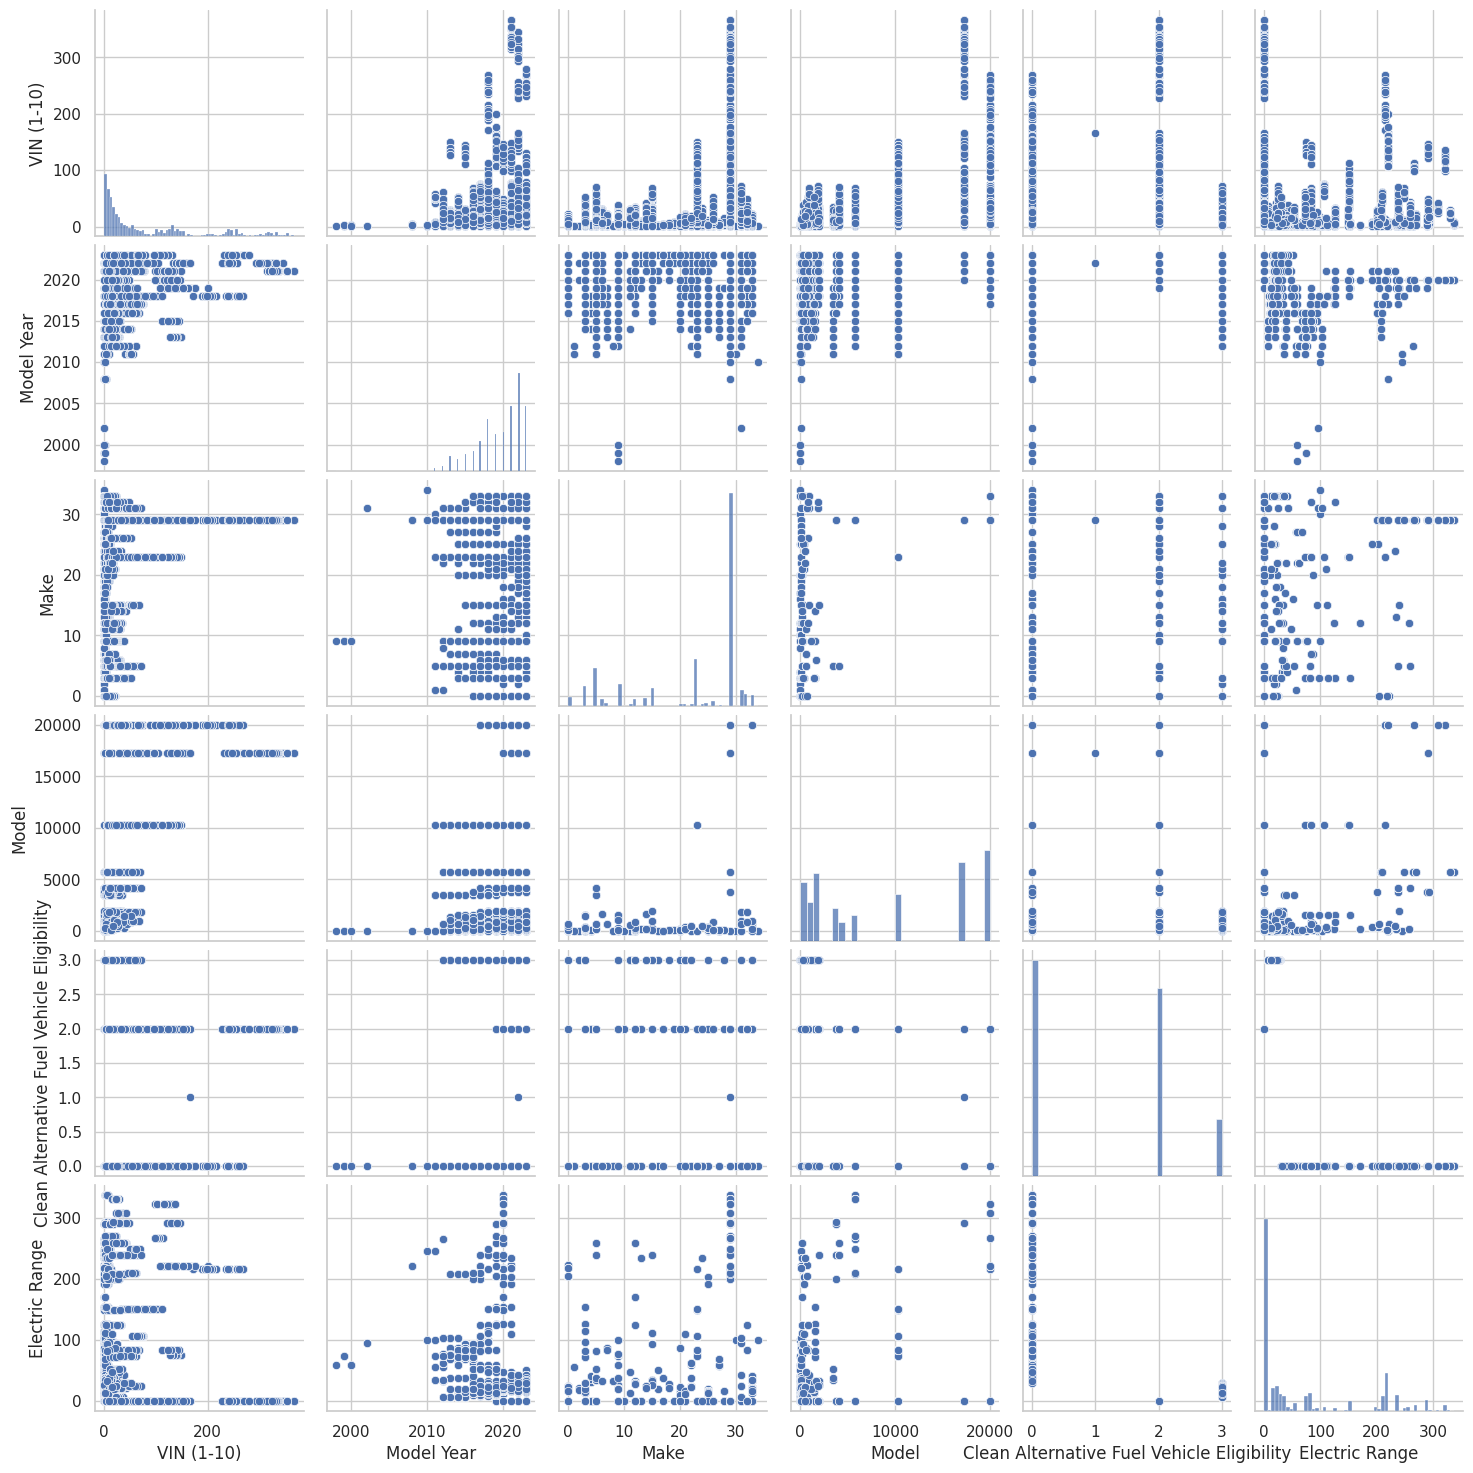

In [ ]:
sns.pairplot(train, vars=['VIN (1-10)', 'Model Year', 'Make', 'Model',
                          'Clean Alternative Fuel Vehicle Eligibility', 'Electric Range'])
plt.show()

In [ ]:
def plot_cm(cm, chart):

    plt.figure(figsize=(6, 5))
    plt.suptitle(f'Confusion Matrix of {chart}', y=1)

    group_names = ['True Negative', 'False Negative', 'False Positive', 'True Positive']
    group_initial = ['(TN)','(FN)','(FP)','(TP)']
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

    labels = [f"{v1}\n{v2}\n\n{v3}" for v1, v2, v3 in zip(group_names, group_initial, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    g = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    g.set_xlabel('Actual')
    g.set_ylabel('Predicted')

    plt.show()

In [ ]:
train.shape

(100973, 18)

In [ ]:
train.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude
0,21,584,383,17,98908.0,2018,29,3794,0,0,238.0,0.0,14.0,141151601.0,690,5.307700e+10,-120.56916,46.58514
1,1,3728,479,17,98370.0,2021,11,577,1,0,47.0,0.0,23.0,171566447.0,60681,5.303509e+10,-122.64681,47.73689
2,176,60960,20528,17,98199.0,2019,29,19985,0,0,220.0,0.0,36.0,9426525.0,21935,5.303301e+10,-122.40092,47.65908
3,133,60960,20528,17,98119.0,2013,23,10276,0,0,75.0,0.0,36.0,211807760.0,21935,5.303301e+10,-122.36840,47.64586
4,52,3661,469,17,98516.0,2017,29,5753,0,0,210.0,0.0,22.0,185810306.0,60681,5.306701e+10,-122.75379,47.06316


train test splitting

In [ ]:
from sklearn.model_selection import train_test_split


sns.set_theme(style="white")

X = train.drop('Electric Vehicle Type', axis=1).values
y = train['Electric Vehicle Type'].values

X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=21)

In [ ]:
from sklearn.impute import SimpleImputer

# Example: Impute NaN values with mean
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train1)



Sampling

In [ ]:
train['Electric Vehicle Type'].value_counts()

0    78019
1    22954
Name: Electric Vehicle Type, dtype: int64

In [ ]:
!pip install imbalanced-learn
from imblearn.under_sampling import NearMiss
from collections import Counter

ns = NearMiss()

print("Original dataset shape:", Counter(y_train))
X_train_resampled, y_train_resampled = ns.fit_resample(X_train, y_train)
print("Resample dataset shape:", Counter(y_train_resampled))

Original dataset shape: Counter({0: 54613, 1: 16068})
Resample dataset shape: Counter({0: 16068, 1: 16068})


Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report


NB_classifier = GaussianNB()
NB_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = NB_classifier.predict(X_test)

accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("="*55)
print("Accuracy     :", accurary)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Accuracy     : 0.6122738676878384
ROC AUC Score: 0.5282193841085107
Classification Report:

               precision    recall  f1-score   support

           0       0.79      0.68      0.73     23406
           1       0.26      0.37      0.30      6886

    accuracy                           0.61     30292
   macro avg       0.52      0.53      0.52     30292
weighted avg       0.67      0.61      0.63     30292

Confusion Matrix:

 [[15971  7435]
 [ 4310  2576]]


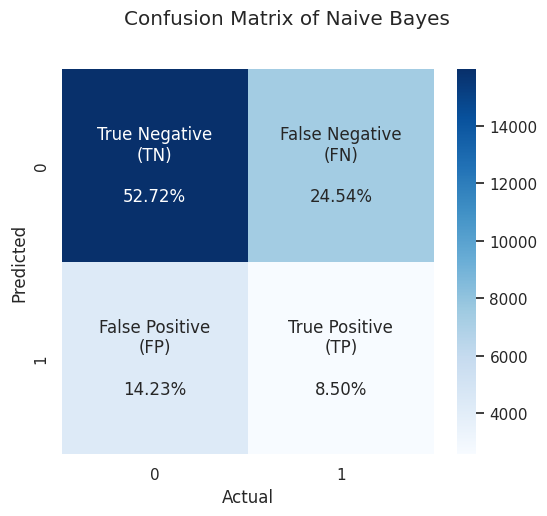

In [ ]:
chart = 'Naive Bayes'

plot_cm(cm, chart)

Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB

kf = KFold(n_splits=10, shuffle=True, random_state=42)

NB_classifier = GaussianNB()

nb_before_tuned_cv_acc_scores = cross_val_score(NB_classifier, X_train_resampled, y_train_resampled,
                                                cv=kf, n_jobs=-1, scoring='accuracy').mean()
nb_before_tuned_cv_rocauc_scores = cross_val_score(NB_classifier, X_train_resampled, y_train_resampled,
                                                    cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("The cross-validation accuracy and ROC AUC score for untuned Naive Bayes after a 10-fold cross-validation:")
print("Accuracy :", nb_before_tuned_cv_acc_scores)
print("ROC AUC  :", nb_before_tuned_cv_rocauc_scores)


The cross-validation accuracy and ROC AUC score for untuned Naive Bayes after a 10-fold cross-validation:
Accuracy : 0.6555257780357526
ROC AUC  : 0.826840836617299


In [ ]:
print(NB_classifier.get_params())

{'priors': None, 'var_smoothing': 1e-09}


Hyperparameter Tuning


```
# This is formatted as code
```



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

grid_nb_acc = GridSearchCV(NB_classifier, param_grid, cv=kf, n_jobs=-1, scoring='accuracy')
grid_nb_rocauc = GridSearchCV(NB_classifier, param_grid, cv=kf, n_jobs=-1, scoring='roc_auc')

grid_nb_acc.fit(X_train_resampled, y_train_resampled)
grid_nb_rocauc.fit(X_train_resampled, y_train_resampled)


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},
             scoring='roc_auc')

In [ ]:
best_hyperparams_acc = grid_nb_acc.best_params_
best_hyperparams_rocauc = grid_nb_rocauc.best_params_

print("Best hyperparameters for accuracy and ROC AUC:")
print("Accuracy :\n", best_hyperparams_acc)
print("ROC AUC  :\n", best_hyperparams_rocauc)

nb_after_tuned_cv_acc_scores = grid_nb_acc.best_score_
nb_after_tuned_cv_rocauc_scores = grid_nb_rocauc.best_score_

print(f"\nThe cross-validation accuracy and ROC AUC score for tuned {chart} after a 10 fold cross validation:")
print("Accuracy :", nb_after_tuned_cv_acc_scores)
print("ROC AUC  :", nb_after_tuned_cv_rocauc_scores)

best_nb_model = grid_nb_acc.best_estimator_

Best hyperparameters for accuracy and ROC AUC:
Accuracy :
 {'var_smoothing': 1e-09}
ROC AUC  :
 {'var_smoothing': 1e-09}

The cross-validation accuracy and ROC AUC score for tuned Naive Bayes after a 10 fold cross validation:
Accuracy : 0.6555257780357526
ROC AUC  : 0.826840836617299


In [ ]:
best_nb_fit_for_train_data_acc = cross_val_score(best_nb_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1).mean()

best_nb_fit_for_train_data_rocauc = cross_val_score(best_nb_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Train Data")
print("Accuracy :", best_nb_fit_for_train_data_acc)
print("ROC AUC  :", best_nb_fit_for_train_data_rocauc)

best_nb_fit_for_test_data_acc = cross_val_score(best_nb_model, X_test, y_test,
                                            cv=kf, n_jobs=-1).mean()
best_nb_fit_for_test_data_rocauc = cross_val_score(best_nb_model, X_test, y_test,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Test Data")
print("Accuracy :", best_nb_fit_for_test_data_acc)
print("ROC AUC  :", best_nb_fit_for_test_data_rocauc)

Train Data
Accuracy : 0.6555257780357526
ROC AUC  : 0.826840836617299
Test Data
Accuracy : 0.7725469744069158
ROC AUC  : 0.7496750391075999


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LR_classifier = LogisticRegression()
LR_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = LR_classifier.predict(X_test)

accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("="*55)
print("Accuracy     :", accurary)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Accuracy     : 0.48042387429024164
ROC AUC Score: 0.5047569853139082
Classification Report:

               precision    recall  f1-score   support

           0       0.78      0.46      0.58     23406
           1       0.23      0.55      0.32      6886

    accuracy                           0.48     30292
   macro avg       0.50      0.50      0.45     30292
weighted avg       0.65      0.48      0.52     30292

Confusion Matrix:

 [[10770 12636]
 [ 3103  3783]]


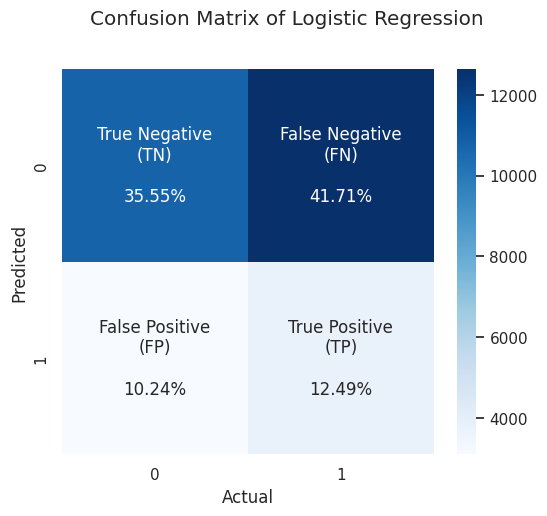

In [ ]:
chart = 'Logistic Regression'

plot_cm(cm, chart)

Cross Validation

In [ ]:

lr_before_tuned_cv_acc_scores = cross_val_score(LR_classifier, X_train_resampled, y_train_resampled,
                                            cv=kf, n_jobs=-1, scoring='accuracy').mean()
lr_before_tuned_cv_rocauc_scores = cross_val_score(LR_classifier, X_train_resampled, y_train_resampled,
                                            cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print(f"The cross-validation accuracy and ROC AUC score for untuned {chart} after a 10 fold cross validation:")
print("Accuracy :", lr_before_tuned_cv_acc_scores)
print("ROC AUC  :", lr_before_tuned_cv_rocauc_scores)

The cross-validation accuracy and ROC AUC score for untuned Logistic Regression after a 10 fold cross validation:
Accuracy : 0.5964356647727195
ROC AUC  : 0.6056527080104905


In [ ]:
print(LR_classifier.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


hyperparameter tuning

In [ ]:
param_grid = {
    'penalty': ['l2', 'none'],
    'C': [0.1, 1, 10, 20],
    'fit_intercept': [True, False],
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 200, 300],
    'random_state': [None, 42, 21],
    'warm_start': [True, False]
}


grid_lr_acc = GridSearchCV(LR_classifier, param_grid, cv=kf, n_jobs=-1, scoring='accuracy')
grid_lr_rocauc = GridSearchCV(LR_classifier, param_grid, cv=kf, n_jobs=-1, scoring='roc_auc')

grid_lr_acc.fit(X_train_resampled, y_train_resampled)
grid_lr_rocauc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 20],
                         'class_weight': [None, 'balanced'],
                         'fit_intercept': [True, False],
                         'max_iter': [100, 200, 300], 'penalty': ['l2', 'none'],
                         'random_state': [None, 42, 21],
                         'warm_start': [True, False]},
             scoring='roc_auc')

In [ ]:
best_hyperparams_acc = grid_lr_acc.best_params_
best_hyperparams_rocauc = grid_lr_rocauc.best_params_

print("Best hyperparameters for accuracy and ROC AUC:")
print("Accuracy :\n", best_hyperparams_acc)
print("ROC AUC  :\n", best_hyperparams_rocauc)

lr_after_tuned_cv_acc_scores = grid_lr_acc.best_score_
lr_after_tuned_cv_rocauc_scores = grid_lr_rocauc.best_score_

print(f"\nThe cross-validation accuracy and ROC AUC score for tuned {chart} after a 10 fold cross validation:")
print("Accuracy :", lr_after_tuned_cv_acc_scores)
print("ROC AUC  :", lr_after_tuned_cv_rocauc_scores)

best_lr_model = grid_lr_acc.best_estimator_

Best hyperparameters for accuracy and ROC AUC:
Accuracy :
 {'C': 0.1, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'random_state': None, 'warm_start': True}
ROC AUC  :
 {'C': 0.1, 'class_weight': None, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'random_state': None, 'warm_start': True}

The cross-validation accuracy and ROC AUC score for tuned Number of Electric Vehicles Based on Target after a 10 fold cross validation:
Accuracy : 0.5613649437432432
ROC AUC  : 0.5498491823862987


In [ ]:
best_lr_fit_for_train_data_acc = cross_val_score(best_lr_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1).mean()

best_lr_fit_for_train_data_rocauc = cross_val_score(best_lr_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Train Data")
print("Accuracy :", best_lr_fit_for_train_data_acc)
print("ROC AUC  :", best_lr_fit_for_train_data_rocauc)

best_lr_fit_for_test_data_acc = cross_val_score(best_lr_model, X_test, y_test,
                                            cv=kf, n_jobs=-1).mean()
best_lr_fit_for_test_data_rocauc = cross_val_score(best_lr_model, X_test, y_test,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Test Data")
print("Accuracy :", best_lr_fit_for_test_data_acc)
print("ROC AUC  :", best_lr_fit_for_test_data_rocauc)

Train Data
Accuracy : 0.5613649437432432
ROC AUC  : 0.5498490707351903
Test Data
Accuracy : 0.5190637421662603
ROC AUC  : 0.5000523350108292


Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report

# initialize the Random Forest classifier and fit it to the resampled training data
RF_classifier = RandomForestClassifier(n_estimators=100)
RF_classifier.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred = RF_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("=" * 55)
print("Accuracy     :", accuracy)
print("ROC AUC Score:", roc_auc)
print("=" * 55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("=" * 55)
print("Confusion Matrix:\n\n", cm)
print("=" * 55)


Accuracy     : 0.9984156189307983
ROC AUC Score: 0.9988914715537285
Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     30046
           1       0.99      1.00      1.00      9086

    accuracy                           1.00     39132
   macro avg       1.00      1.00      1.00     39132
weighted avg       1.00      1.00      1.00     39132

Confusion Matrix:

 [[29986    60]
 [    2  9084]]


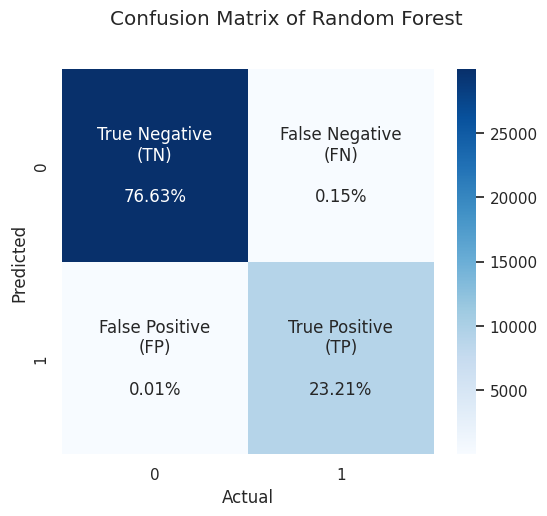

In [ ]:
chart = 'Random Forest'

# plot the confusion matrix
plot_cm(cm, chart)

Cross Validation

In [ ]:
# compute the cross-validation accuracy scores and ROC AUC scores for the untuned RF classifier
rf_before_tuned_cv_acc_scores = cross_val_score(RF_classifier, X_train_resampled, y_train_resampled,
                                            cv=kf, n_jobs=-1, scoring='accuracy').mean()
rf_before_tuned_cv_rocauc_scores = cross_val_score(RF_classifier, X_train_resampled, y_train_resampled,
                                            cv=kf, n_jobs=-1, scoring='roc_auc').mean()

# print the cross-validation results
print(f"The cross-validation accuracy and ROC AUC score for untuned {chart} after a 10 fold cross validation:")
print("Accuracy :", rf_before_tuned_cv_acc_scores)
print("ROC AUC  :", rf_before_tuned_cv_rocauc_scores)

The cross-validation accuracy and ROC AUC score for untuned Random Forest after a 10 fold cross validation:
Accuracy : 0.9995990732872719
ROC AUC  : 0.9999935772019727


In [ ]:
print(RF_classifier.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Hyperparametrs

In [ ]:
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 5, 10],
    'bootstrap': [True, False],
}


grid_rf_acc = GridSearchCV(RF_classifier, param_grid, cv=kf, n_jobs=-1, scoring='accuracy')
grid_rf_rocauc = GridSearchCV(RF_classifier, param_grid, cv=kf, n_jobs=-1, scoring='roc_auc')


grid_rf_acc.fit(X_train_resampled, y_train_resampled)
grid_rf_rocauc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [None, 5, 10],
                         'n_estimators': [100, 150]},
             scoring='roc_auc')

In [ ]:
best_hyperparams_acc = grid_rf_acc.best_params_
best_hyperparams_rocauc = grid_rf_rocauc.best_params_

print("Best hyperparameters for accuracy and ROC AUC:")
print("Accuracy :\n", best_hyperparams_acc)
print("ROC AUC  :\n", best_hyperparams_rocauc)

rf_after_tuned_cv_acc_scores = grid_rf_acc.best_score_
rf_after_tuned_cv_rocauc_scores = grid_rf_rocauc.best_score_

print(f"\nThe cross-validation accuracy and ROC AUC score for tuned {chart} after a 10 fold cross validation:")
print("Accuracy :", rf_after_tuned_cv_acc_scores)
print("ROC AUC  :", rf_after_tuned_cv_rocauc_scores)

best_rf_model = grid_rf_acc.best_estimator_

Best hyperparameters for accuracy and ROC AUC:
Accuracy :
 {'bootstrap': False, 'max_depth': None, 'n_estimators': 100}
ROC AUC  :
 {'bootstrap': False, 'max_depth': None, 'n_estimators': 100}

The cross-validation accuracy and ROC AUC score for tuned Random Forest after a 10 fold cross validation:
Accuracy : 0.9996462319762605
ROC AUC  : 0.9999972287385978


In [ ]:
best_rf_fit_for_train_data_acc = cross_val_score(best_rf_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1).mean()

best_rf_fit_for_train_data_rocauc = cross_val_score(best_rf_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Train Data")
print("Accuracy :", best_rf_fit_for_train_data_acc)
print("ROC AUC  :", best_rf_fit_for_train_data_rocauc)

best_rf_fit_for_test_data_acc = cross_val_score(best_rf_model, X_test, y_test,
                                            cv=kf, n_jobs=-1).mean()
best_rf_fit_for_test_data_rocauc = cross_val_score(best_rf_model, X_test, y_test,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Test Data")
print("Accuracy :", best_rf_fit_for_test_data_acc)
print("ROC AUC  :", best_rf_fit_for_test_data_rocauc)

Train Data
Accuracy : 0.9996462319762605
ROC AUC  : 0.9999729624330218
Test Data
Accuracy : 0.9996677871450602
ROC AUC  : 0.9999989758931365


XGboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report


params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}


XGB_classifier = xgb.XGBClassifier(**params)
XGB_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = XGB_classifier.predict(X_test)

accurary = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("="*55)
print("Accuracy     :", accurary)
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Accuracy     : 0.9983134007973015
ROC AUC Score: 0.9987481298211626
Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     30046
           1       0.99      1.00      1.00      9086

    accuracy                           1.00     39132
   macro avg       1.00      1.00      1.00     39132
weighted avg       1.00      1.00      1.00     39132

Confusion Matrix:

 [[29984    62]
 [    4  9082]]


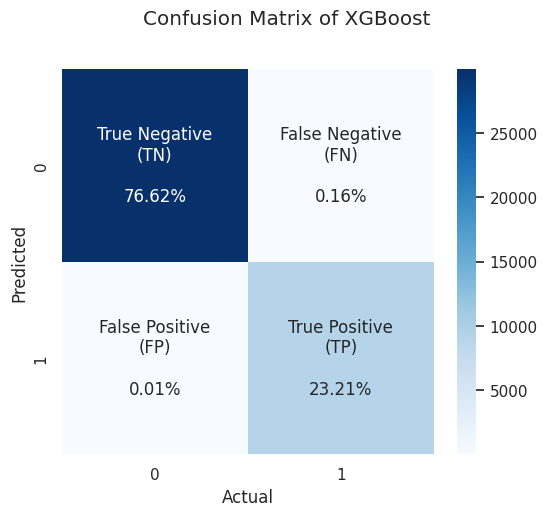

In [ ]:
chart = 'XGBoost'

plot_cm(cm, chart)

Cross validation

In [ ]:
xg_before_tuned_cv_acc_scores = cross_val_score(XGB_classifier, X_train_resampled, y_train_resampled,
                                            cv=kf, n_jobs=-1, scoring='accuracy').mean()
xg_before_tuned_cv_rocauc_scores = cross_val_score(XGB_classifier, X_train_resampled, y_train_resampled,
                                            cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print(f"The cross-validation accuracy and ROC AUC score for untuned {chart} after a 10 fold cross validation:")
print("Accuracy :", xg_before_tuned_cv_acc_scores)
print("ROC AUC  :", xg_before_tuned_cv_rocauc_scores)

The cross-validation accuracy and ROC AUC score for untuned XGBoost after a 10 fold cross validation:
Accuracy : 0.9996934017875813
ROC AUC  : 0.999965043353856


In [ ]:
print(XGB_classifier.get_params())

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'gamma': 0, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 3, 'max_leaves': None, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.8, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'eta': 0.1, 'seed': 42}


Hyperparameter tuning

In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5],
    'random_state': [42, 21, 10]
}

grid_xgb_acc = GridSearchCV(XGB_classifier, param_grid, cv=kf, n_jobs=-1, scoring='accuracy')
grid_xgb_rocauc = GridSearchCV(XGB_classifier, param_grid, cv=kf, n_jobs=-1, scoring='roc_auc')

grid_xgb_acc.fit(X_train_resampled, y_train_resampled)
grid_xgb_rocauc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eta=0.1,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=0, grow_policy=None,
                                     importance_typ...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=3,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [3, 5],
                         'random_state': [42, 21, 10]},
             scoring='roc_auc')

In [ ]:
best_hyperparams_acc = grid_xgb_acc.best_params_
best_hyperparams_rocauc = grid_xgb_rocauc.best_params_

print("Best hyperparameters for accuracy and ROC AUC:")
print("Accuracy :\n", best_hyperparams_acc)
print("ROC AUC  :\n", best_hyperparams_rocauc)

xgb_after_tuned_cv_acc_scores = grid_xgb_acc.best_score_
xgb_after_tuned_cv_rocauc_scores = grid_xgb_rocauc.best_score_

print(f"\nThe cross-validation accuracy and ROC AUC score for tuned {chart} after a 10 fold cross validation:")
print("Accuracy :", xgb_after_tuned_cv_acc_scores)
print("ROC AUC  :", xgb_after_tuned_cv_rocauc_scores)

best_xgb_model = grid_xgb_acc.best_estimator_

Best hyperparameters for accuracy and ROC AUC:
Accuracy :
 {'learning_rate': 0.1, 'max_depth': 5, 'random_state': 42}
ROC AUC  :
 {'learning_rate': 0.1, 'max_depth': 5, 'random_state': 42}

The cross-validation accuracy and ROC AUC score for tuned XGBoost after a 10 fold cross validation:
Accuracy : 0.9997641565045623
ROC AUC  : 0.9999990873035938


In [ ]:
best_xgb_fit_for_train_data_acc = cross_val_score(best_xgb_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1).mean()

best_xgb_fit_for_train_data_rocauc = cross_val_score(best_xgb_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Train Data")
print("Accuracy :", best_xgb_fit_for_train_data_acc)
print("ROC AUC  :", best_xgb_fit_for_train_data_rocauc)

best_xgb_fit_for_test_data_acc = cross_val_score(best_xgb_model, X_test, y_test,
                                            cv=kf, n_jobs=-1).mean()
best_xgb_fit_for_test_data_rocauc = cross_val_score(best_xgb_model, X_test, y_test,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Test Data")
print("Accuracy :", best_xgb_fit_for_test_data_acc)
print("ROC AUC  :", best_xgb_fit_for_test_data_rocauc)

Train Data
Accuracy : 0.9997641565045623
ROC AUC  : 0.9999990873035938
Test Data
Accuracy : 0.9998466780216255
ROC AUC  : 0.9999916521381312


Model Evaluation

Model selection

In [ ]:
dict_result = {'Model' :['Naive Bayes', 'Logistic Regression', 'Random Forest', 'XGBoost'],
                "Accuracy (train)": [best_nb_fit_for_train_data_acc, best_lr_fit_for_train_data_acc,
                                             best_rf_fit_for_train_data_acc, best_xgb_fit_for_train_data_acc],
                "Accuracy (test)": [best_nb_fit_for_test_data_acc, best_lr_fit_for_test_data_acc,
                                            best_rf_fit_for_test_data_acc, best_xgb_fit_for_test_data_acc],
                "ROC-AUC (train)": [best_nb_fit_for_train_data_rocauc, best_lr_fit_for_train_data_rocauc,
                                             best_rf_fit_for_train_data_rocauc, best_xgb_fit_for_train_data_rocauc],
                "ROC-AUC (test)": [best_nb_fit_for_test_data_rocauc, best_lr_fit_for_test_data_rocauc,
                                            best_rf_fit_for_test_data_rocauc, best_xgb_fit_for_test_data_rocauc]}

model_result = pd.DataFrame(dict_result).sort_values(by=['ROC-AUC (test)', 'Accuracy (test)'], ascending= False).reset_index(drop=True)
model_result

,Model,Accuracy (train),Accuracy (test),ROC-AUC (train),ROC-AUC (test)
0,Random Forest,0.999646,0.999668,0.999973,0.999999
1,XGBoost,0.999764,0.999847,0.999999,0.999992
2,Naive Bayes,0.579689,0.767147,0.803538,0.708770
3,Logistic Regression,0.561365,0.519064,0.549849,0.500052


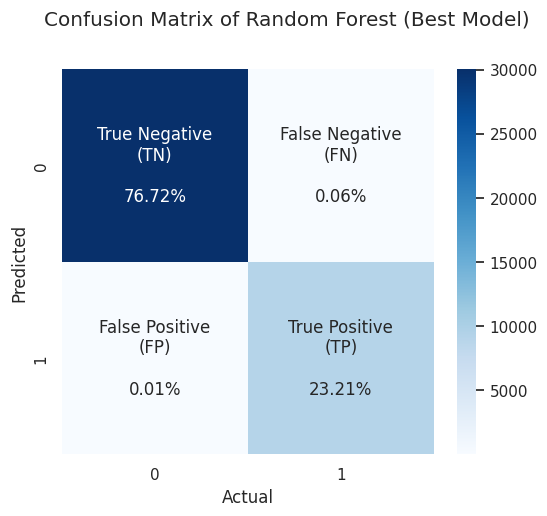

In [ ]:
chart = 'Random Forest (Best Model)'

cm = confusion_matrix(y_test, best_rf_model.predict(X_test))

plot_cm(cm, chart)

ROC AUC Curve

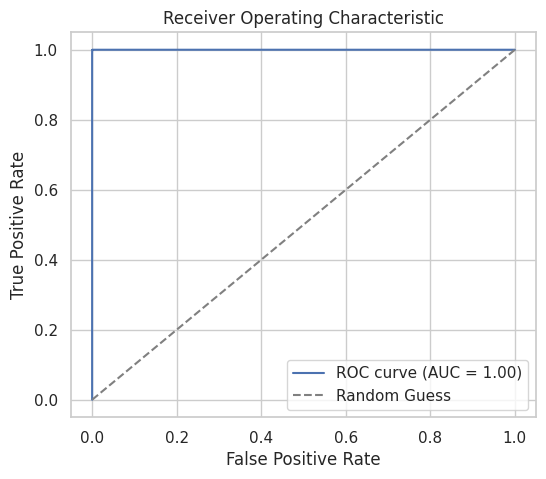

In [ ]:
from sklearn.metrics import roc_curve, auc

y_prob = best_rf_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Feature importance

In [ ]:
train.shape

(130440, 18)

In [ ]:
x = train.drop('Electric Vehicle Type', axis=1)
y = train['Electric Vehicle Type']

In [ ]:
x.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Clean Alternative Fuel Vehicle Eligibility',
       'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Electric Utility', '2020 Census Tract', 'Longitude', 'Latitude'],
      dtype='object')

In [ ]:
#!pip install shap

#import shap
# define an explainer object using the best model, get the importance values, and plot into a bar plot
#explainer = shap.TreeExplainer(best_rf_model)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X, plot_type='bar', show=False)

#plt.xlabel('SHAP Value')
#plt.title('Feature Importance')
#plt.tight_layout()
#plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.2 MB/s eta 0:00:00


In [ ]:
importance = best_rf_model.feature_importances_

feature_importance = pd.DataFrame({'Feature': x.columns,
                                   'Importance': importance})\
                                    .sort_values(by='Importance', ascending=False)\
                                    .reset_index(drop=True)
feature_importance.head()

,Feature,Importance
0,Electric Range,0.412619
1,Model,0.177555
2,Clean Alternative Fuel Vehicle Eligibility,0.167526
3,Make,0.078029
4,VIN (1-10),0.061180


In [ ]:
predictions = pd.DataFrame({'Prediction': best_rf_model.predict(train.drop('Electric Vehicle Type', axis=1))})
result = pd.concat([predictions, train], axis=1).rename(columns={'Electric Vehicle Type': 'Actual', 'Prediction': 'Predicted'})

columns = ['Predicted', 'Actual', 'VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make',
           'Model', 'Clean Alternative Fuel Vehicle Eligibility', 'Electric Range', 'Base MSRP',
           'Legislative District', 'DOL Vehicle ID', 'Electric Utility', '2020 Census Tract', 'Longitude', 'Latitude']
result = result[columns]

result['Electric Vehicle Type (Actual)'] = result['Actual'].map({1: 'PHEV', 0: 'BEV'})
result['Electric Vehicle Type (Predicted)'] = result['Predicted'].map({1: 'PHEV', 0: 'BEV'})

integer_columns = ['Predicted', 'Actual', 'Postal Code', 'Model Year', 'Electric Range', 'Base MSRP',
                   'Legislative District', '2020 Census Tract']
result[integer_columns] = result[integer_columns].astype('Int64')

result.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,Predicted,Actual,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,...,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude,Electric Vehicle Type (Actual),Electric Vehicle Type (Predicted)
0,0,0,25.0,709.0,471.0,41.0,98908,2018,29.0,4792.0,...,238,0,14,141151601.0,968.0,53077001100,-120.56916,46.58514,BEV,BEV
1,1,1,1.0,4344.0,521.0,41.0,98370,2021,11.0,782.0,...,47,0,23,171566447.0,76184.0,53035090400,-122.64681,47.73689,PHEV,PHEV
2,0,0,221.0,68477.0,22894.0,41.0,98199,2019,29.0,25532.0,...,220,0,36,9426525.0,24236.0,53033005803,-122.40092,47.65908,BEV,BEV
3,0,0,172.0,68477.0,22894.0,41.0,98119,2013,23.0,12960.0,...,75,0,36,211807760.0,24236.0,53033005804,-122.36840,47.64586,BEV,BEV
4,0,0,62.0,4694.0,656.0,41.0,98516,2017,29.0,7399.0,...,210,0,22,185810306.0,76184.0,53067012226,-122.75379,47.06316,BEV,BEV


In [ ]:

columns_to_copy = ['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Clean Alternative Fuel Vehicle Eligibility',
                   'DOL Vehicle ID', 'Electric Utility']

for column in columns_to_copy:
    result[column] = df[column]
result.head()

,Predicted,Actual,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,...,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Longitude,Latitude,Electric Vehicle Type (Actual),Electric Vehicle Type (Predicted)
0,0,0,5YJXCAE26J,Yakima,Yakima,Washington,98908,2018,TESLA,MODEL X,...,238,0,14,141151601.0,PACIFICORP,53077001100,-120.56916,46.58514,BEV,BEV
1,1,1,JHMZC5F37M,Kitsap,Poulsbo,Washington,98370,2021,HONDA,CLARITY,...,47,0,23,171566447.0,PUGET SOUND ENERGY INC,53035090400,-122.64681,47.73689,PHEV,PHEV
2,0,0,5YJ3E1EB0K,King,Seattle,Washington,98199,2019,TESLA,MODEL 3,...,220,0,36,9426525.0,CITY OF SEATTLE,53033005803,-122.40092,47.65908,BEV,BEV
3,0,0,1N4AZ0CP5D,King,Seattle,Washington,98119,2013,NISSAN,LEAF,...,75,0,36,211807760.0,CITY OF SEATTLE,53033005804,-122.36840,47.64586,BEV,BEV
4,0,0,5YJSA1E21H,Thurston,Lacey,Washington,98516,2017,TESLA,MODEL S,...,210,0,22,185810306.0,PUGET SOUND ENERGY INC,53067012226,-122.75379,47.06316,BEV,BEV
